In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Aranaur/aranaur.rbind.io/main/datasets/conversion/conversion.csv")

In [3]:
# Перевірка кількості спостережень і стовпців
print("Розмірність даних:", data.shape)

Розмірність даних: (1143, 11)


In [4]:
# Перевірка типів даних
print("\nТипи даних:")
print(data.dtypes)


Типи даних:
ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object


In [5]:
# Перевірка пропущених значень
print("\nПропущені значення:")
print(data.isnull().sum())


Пропущені значення:
ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64


In [6]:
# Перевірка унікальних значень
print("\nУнікальні значення в кожному стовпці:")

for col in data.columns:
    print(f"{col}: {data[col].nunique()} унікальних значень")


Унікальні значення в кожному стовпці:
ad_id: 1143 унікальних значень
xyz_campaign_id: 3 унікальних значень
fb_campaign_id: 691 унікальних значень
age: 4 унікальних значень
gender: 2 унікальних значень
interest: 40 унікальних значень
Impressions: 1130 унікальних значень
Clicks: 183 унікальних значень
Spent: 869 унікальних значень
Total_Conversion: 32 унікальних значень
Approved_Conversion: 16 унікальних значень


In [16]:
# Об'єднання двох стовпців і підрахунок унікальних значень
unique_campaigns = pd.concat([data["xyz_campaign_id"], data["fb_campaign_id"]]).nunique()

print("\nКількість унікальних рекламних кампаній (xyz та fb):", unique_campaigns)


Кількість унікальних рекламних кампаній (xyz та fb): 694


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [18]:
data['log_Impressions'] = np.log1p(data['Impressions'])

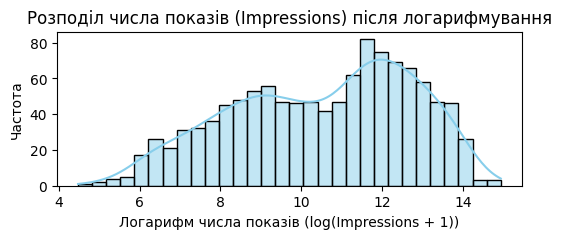

In [20]:
# Побудова графіка розподілу
plt.figure(figsize=(6, 2))
sns.histplot(data['log_Impressions'], kde=True, bins=30, color='skyblue')
plt.title('Розподіл числа показів (Impressions) після логарифмування')
plt.xlabel('Логарифм числа показів (log(Impressions + 1))')
plt.ylabel('Частота')
plt.show()

In [22]:
# Перевірка на нормальність (тест Шапіро-Вілка)
stat, p_value = stats.shapiro(data['log_Impressions'].dropna())
print(f"Тест Шапіро-Вілка: Статистика = {stat}, p-значення = {p_value}")

Тест Шапіро-Вілка: Статистика = 0.9674083869418838, p-значення = 2.4344922949566835e-15


In [24]:
# Нова змінна CTR(clikc-through rate)
data['CTR'] = data['Clicks']/data['Impressions']
data['CTR'].head()

0    0.000136
1    0.000112
2    0.000000
3    0.000235
4    0.000242
Name: CTR, dtype: float64

In [29]:
max_ctr = data.loc[data['CTR'].idxmax()]
max_ctr[['ad_id', 'CTR']]

ad_id      738637
CTR      0.001059
Name: 150, dtype: object

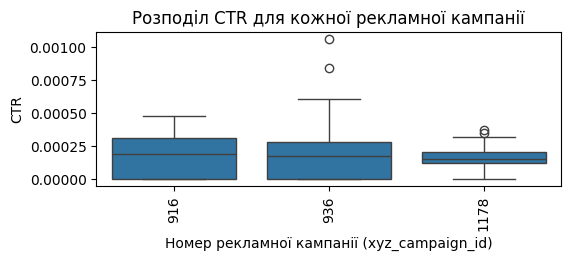

In [31]:
# Візуалізація розподілу CTR для кожної рекламної кампанії (xyz_campaign_id)
plt.figure(figsize=(6, 2))
sns.boxplot(x='xyz_campaign_id', y='CTR', data=data)
plt.title('Розподіл CTR для кожної рекламної кампанії')
plt.xlabel('Номер рекламної кампанії (xyz_campaign_id)')
plt.ylabel('CTR')
plt.xticks(rotation=90)
plt.show()

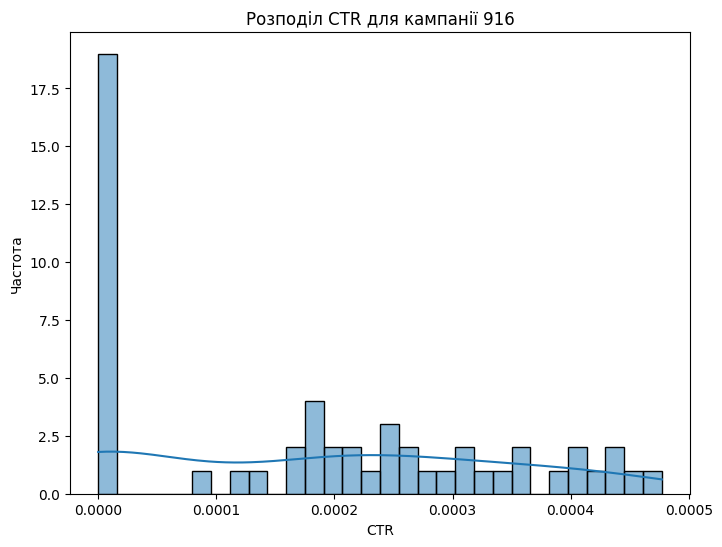

In [32]:
# Фільтрація даних для кампанії 916
campaign_916 = data[data['xyz_campaign_id'] == 916]

# Візуалізація розподілу CTR для кампанії 916
plt.figure(figsize=(8, 6))
sns.histplot(campaign_916['CTR'], kde=True, bins=30)
plt.title('Розподіл CTR для кампанії 916')
plt.xlabel('CTR')
plt.ylabel('Частота')
plt.show()

In [33]:
# Створення нової змінної CPC (cost-per-click)
data['CPC'] = data['Spent'] / data['Clicks']
data.head(2)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,log_Impressions,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,8.902592,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,9.790431,0.000112,0.91


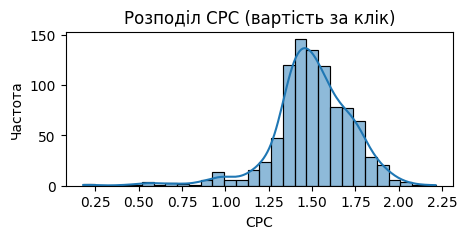

In [34]:
# Візуалізація розподілу CPC
plt.figure(figsize=(5, 2))
sns.histplot(data['CPC'], kde=True, bins=30)
plt.title('Розподіл CPC (вартість за клік)')
plt.xlabel('CPC')
plt.ylabel('Частота')
plt.show()

In [35]:
# Розрахунок міжквартильного розмаху (IQR)
Q1 = data['CPC'].quantile(0.25)
Q3 = data['CPC'].quantile(0.75)
IQR = round(Q3 - Q1, 2)

print(f"Міжквартильний розмах (IQR): {IQR}")

Міжквартильний розмах (IQR): 0.25


In [36]:
# Фільтрація даних для оголошення з ad_id = 1121814
ad_data = data[data['ad_id'] == 1121814]

# Обчислення конверсії
clicks = ad_data['Clicks'].values[0]
approved_conversion = ad_data['Approved_Conversion'].values[0]

if clicks > 0:  # Переконатися, що кількість кліків більша за 0
    conversion_rate = (approved_conversion / clicks) * 100
else:
    conversion_rate = 0

# Виведення результату, округленого до 2 знаків
print(f"Конверсія для оголошення 1121814: {conversion_rate:.2f}%")

Конверсія для оголошення 1121814: 3.09%
